In [1]:
%load_ext autoreload
%autoreload 2

In [100]:
import copy
import os
import sys
import uuid
from importlib import reload
sys.path.append(r'C:\dev\projects\weedget')

import ipywidgets as w
import ipyvuetify as v
import ipyvue as vue
import numpy as np
import pandas as pd
import traitlets

from plotly import graph_objects as go
from weedget import base as b, components as c
reload(c)
rng = np.random.default_rng(1988)
pd.options.plotting.backend = "plotly"

In [3]:
n_cols = 5
n_rows = 10
start = '1900-01-01'

df = pd.DataFrame(
    data=rng.normal(size=(n_rows, n_cols)),
    index=pd.DatetimeIndex(pd.date_range(start=start, periods=n_rows)),
    columns=[uuid.uuid4().hex[:10] for i in range(n_cols)]
)

In [67]:
import numpy as np
import pandas as pd

df = pd.DataFrame(np.random.normal(size=(100, 10)))
df.ewm(alpha=0.1).agg(lambda x: x)

In [117]:
feature = features['US_Equity_Fut'].dropna()
param = 50

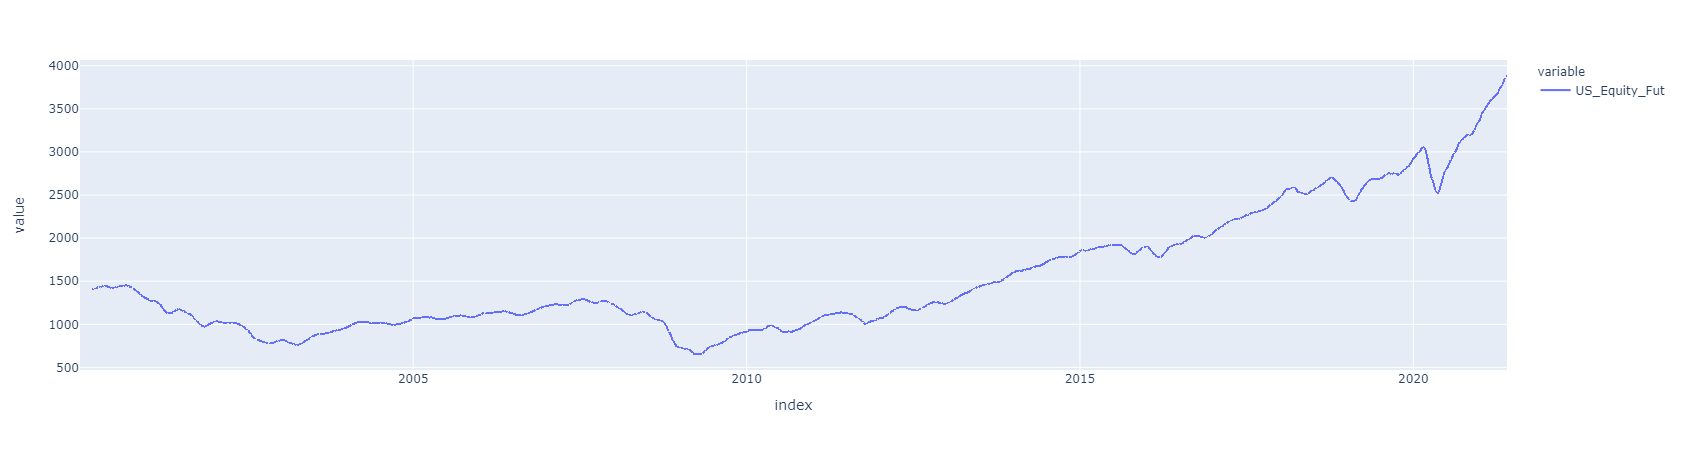

In [124]:
feature.rolling(param).mean().plot()

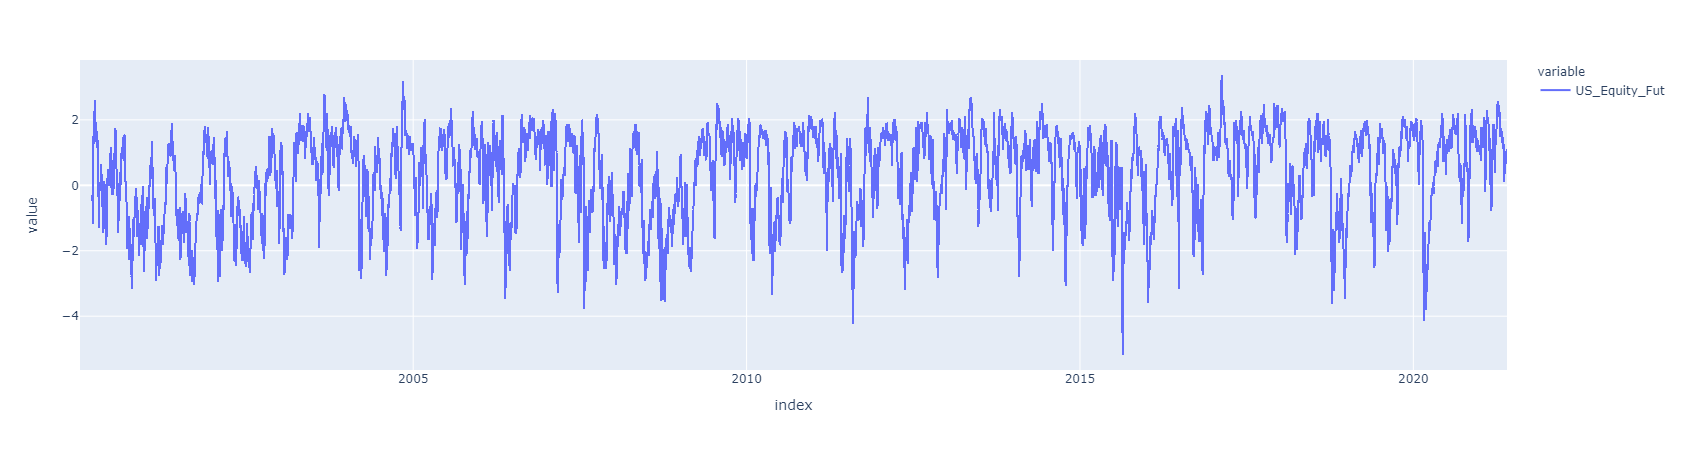

In [118]:
((feature - feature.rolling(param).mean()) / feature.rolling(param).std()).plot()

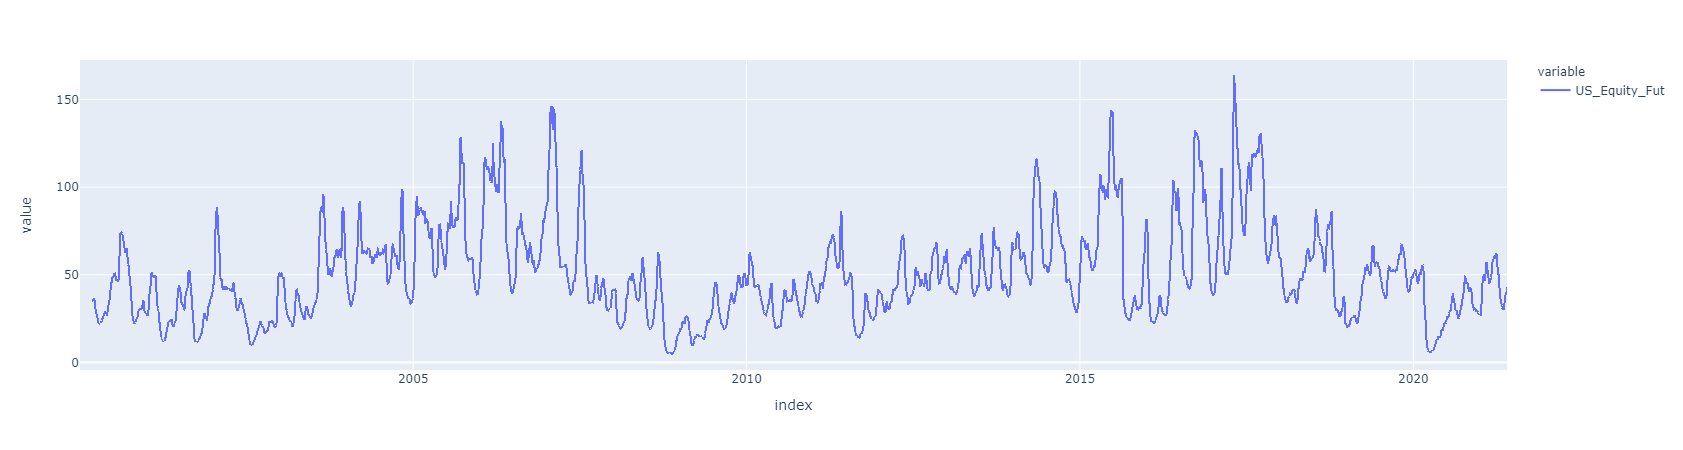

In [123]:
((feature - feature.shift(1).rolling(param).std()) / feature.shift(1).rolling(param).std()).plot()

In [117]:
feature.rolling(param).mean().diff().plot()

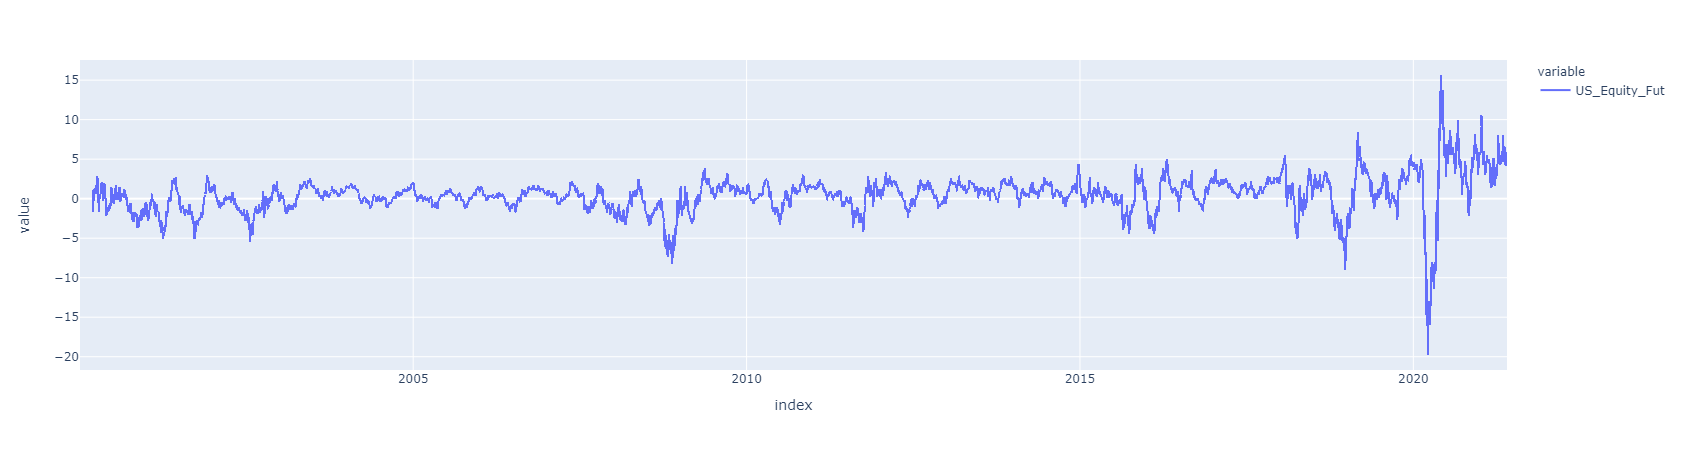

In [115]:
feature.diff().rolling(param).mean().plot()

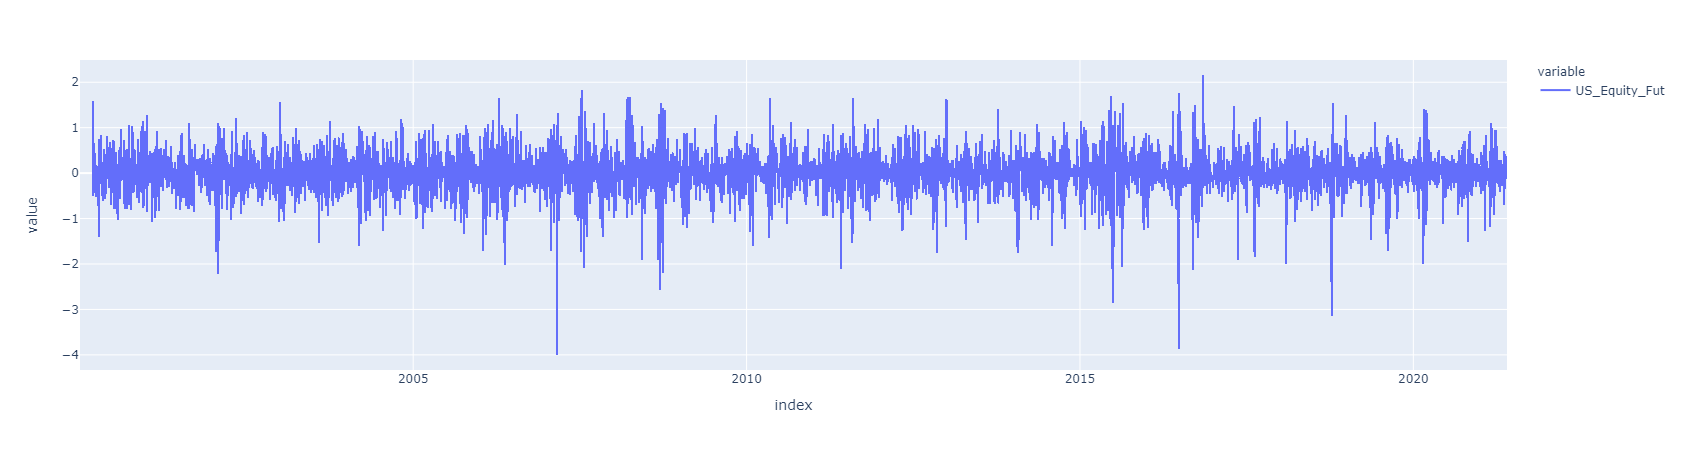

In [101]:
((feature - feature.rolling(param).mean()) / feature.rolling(param).std()).diff().plot()

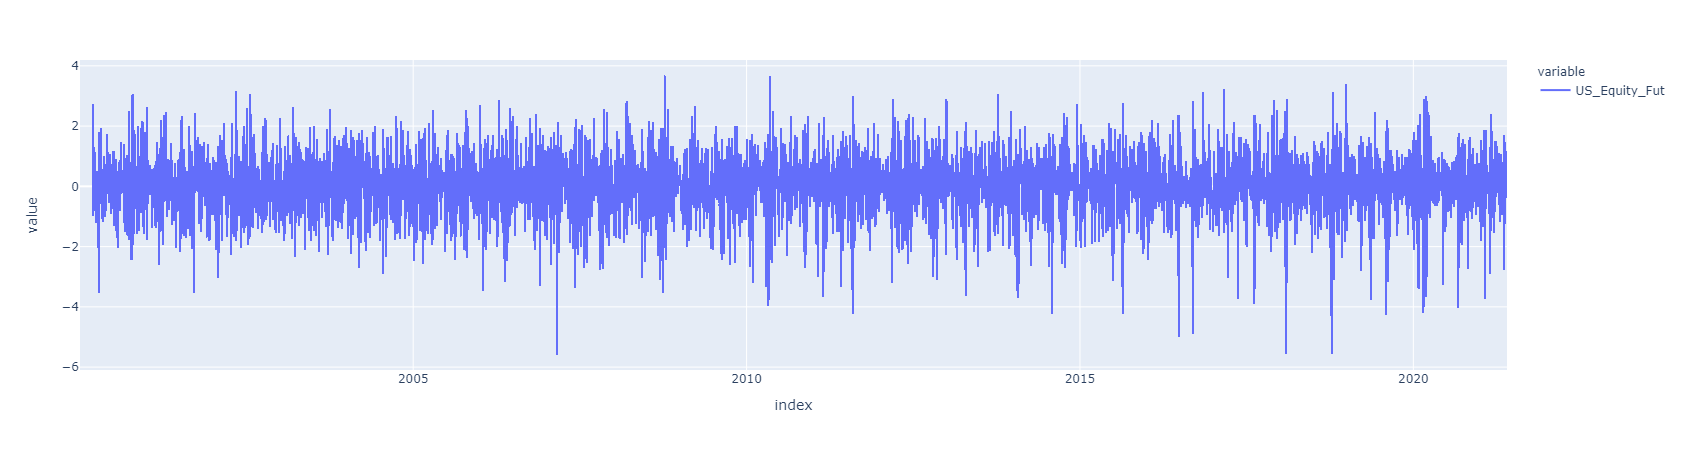

In [116]:
((feature.diff() - feature.diff().rolling(param).mean()) / feature.diff().rolling(param).std()).plot()

In [ ]:
df.ewm(alpha=0.1).agg(lambda x: x)

In [28]:
features = pd.read_csv('../data/Raw_data.csv', index_col=0, parse_dates=True).drop('US_CBO_Nairu', axis=1).dropna(how='all', axis=1).dropna(how='all')

In [50]:
# built in
from typing import Optional

# third party
import numpy as np
import pandas as pd

from scipy import stats
from sklearn.base import TransformerMixin, BaseEstimator 


# Note:
# the reason why the prefix, suffix and sep have no effect for is because I override the _get_columns method
# which doesn't use them at all

class NaFilter(TransformerMixin, BaseEstimator):
    '''
    Filters the columns if the number of nan is greater than  n
    '''
    def __init__(self, n=100):
        self.n = n

    def fit(self, X, y=None, **kwargs):
        n  = self.n * len(X) if isinstance(self.n, float) else self.n
        self.mask_ = X.isna().sum(axis=0) < n
        return self
    
    def transform(self, X, y=None, **kwargs):
        return X.loc[:, self.mask_]

In [ ]:
class EWM(TransformerMixin, BaseEstimator):
    

In [65]:
def fn(x):
    print(x)
    return 3
    

ewm = features.ewm(alpha=0.8)

In [66]:
ewm.agg(fn)

AttributeError: 'ExponentialMovingWindow' object has no attribute 'apply'

In [51]:
NaFilter(n=0.5).fit_transform(features)

JPN_Nikkei_PE  EM_Equity_ETF  US_Bond_10y  US_Bond_2y  US_TWI  \
2000-01-02            NaN            NaN          NaN         NaN     NaN   
2000-01-03            NaN            NaN       6.5920      6.3840     NaN   
2000-01-04            NaN            NaN       6.4970      6.2990   94.14   
2000-01-05            NaN            NaN       6.5940      6.3580   92.28   
2000-01-06            NaN            NaN       6.5240      6.2990   92.67   
...                   ...            ...          ...         ...     ...   
2021-05-25        20.0440       4.071669       1.5588      0.1412   77.28   
2021-05-26        20.1059       4.101767       1.5757      0.1485   77.61   
2021-05-27        20.0405       4.102518       1.6062      0.1446   77.53   
2021-05-28        20.4620       4.102518       1.6130      0.1466   77.56   
2021-05-31            NaN            NaN          NaN         NaN     NaN   

            US_Equity  US_Equity_Vol  US_Breakeven1  US_Breakeven55  US_ois5y  \
2000-01-02        NaN            NaN            NaN             NaN       NaN   
2000-01-03    1455.22          24.21            NaN          2.2881       NaN   
2000-01-04    1399.42          27.01            NaN          2.2386       NaN   
2000-01-05    1402.11          26.41            NaN          2.3284       NaN   
2000-01-06    1403.45          25.73            NaN          2.2266       NaN   
...               ...            ...            ...             ...       ...   
2021-05-25    4188.13          18.84         3.6999          2.2488    0.6960   
2021-05-26    4195.99          17.36         3.6662          2.2441    0.6845   
2021-05-27    4200.88          16.74         3.6250          2.2714    0.7309   
2021-05-28    4200.88          16.77         3.6410          2.2745    0.7269   
2021-05-31        NaN            NaN            NaN             NaN       NaN   

            ...  EMU_Bond_PeriphSp  UK_2y_vs_1m_OIS  UK_vs_FR_10y  \
2000-01-02  ...                NaN              NaN           NaN   
2000-01-03  ...                NaN              NaN        -0.179   
2000-01-04  ...           0.212667              NaN         0.051   
2000-01-05  ...           0.246000              NaN         0.111   
2000-01-06  ...           0.261333              NaN         0.085   
...         ...                ...              ...           ...   
2021-05-25  ...           0.816333           0.0702         0.590   
2021-05-26  ...           0.815000           0.0634         0.597   
2021-05-27  ...           0.806667           0.0903         0.624   
2021-05-28  ...           0.805000           0.0938         0.634   
2021-05-31  ...                NaN              NaN           NaN   

            UK_Bond_1030Sp  UK_Bond_210Sp  GLOB_Equity_Vol  \
2000-01-02             NaN            NaN              NaN   
2000-01-03             NaN            NaN              NaN   
2000-01-04          -0.989         -0.889              NaN   
2000-01-05          -1.045         -0.816              NaN   
2000-01-06          -1.096         -0.800              NaN   
...                    ...            ...              ...   
2021-05-25           0.534          0.770         18.96948   
2021-05-26           0.530          0.729         18.04769   
2021-05-27           0.509          0.758         17.49881   
2021-05-28           0.515          0.760              NaN   
2021-05-31             NaN            NaN              NaN   

            NOK_Norges_RegnSurvey  CH_Steel_Inventory  UK_Sonia_2ysp  \
2000-01-02                    NaN                 NaN            NaN   
2000-01-03                    NaN                0.00            NaN   
2000-01-04                    NaN                0.00            NaN   
2000-01-05                    NaN                0.00            NaN   
2000-01-06                    NaN                0.00            NaN   
...                           ...                 ...            ...   
2021-05-25                   0.92   

In [43]:
nan_filter = NaFilter()

In [48]:

nan_filter.mask_

JPN_Nikkei_PE    False
EM_Equity_ETF    False
US_Bond_10y      False
US_Bond_2y       False
US_TWI           False
                 ...  
GLOB_Manu        False
GLOB_Money       False
GLOB_CPI         False
GLOB_CB_Bal      False
GLOB_CB_Bal2     False
Length: 1689, dtype: bool

In [45]:
nan_filter.fit_transform(features)

Empty DataFrame
Columns: []
Index: [2000-01-02 00:00:00, 2000-01-03 00:00:00, 2000-01-04 00:00:00, 2000-01-05 00:00:00, 2000-01-06 00:00:00, 2000-01-07 00:00:00, 2000-01-09 00:00:00, 2000-01-10 00:00:00, 2000-01-11 00:00:00, 2000-01-12 00:00:00, 2000-01-13 00:00:00, 2000-01-14 00:00:00, 2000-01-16 00:00:00, 2000-01-17 00:00:00, 2000-01-18 00:00:00, 2000-01-19 00:00:00, 2000-01-20 00:00:00, 2000-01-21 00:00:00, 2000-01-23 00:00:00, 2000-01-24 00:00:00, 2000-01-25 00:00:00, 2000-01-26 00:00:00, 2000-01-27 00:00:00, 2000-01-28 00:00:00, 2000-01-30 00:00:00, 2000-01-31 00:00:00, 2000-02-01 00:00:00, 2000-02-02 00:00:00, 2000-02-03 00:00:00, 2000-02-04 00:00:00, 2000-02-06 00:00:00, 2000-02-07 00:00:00, 2000-02-08 00:00:00, 2000-02-09 00:00:00, 2000-02-10 00:00:00, 2000-02-11 00:00:00, 2000-02-13 00:00:00, 2000-02-14 00:00:00, 2000-02-15 00:00:00, 2000-02-16 00:00:00, 2000-02-17 00:00:00, 2000-02-18 00:00:00, 2000-02-20 00:00:00, 2000-02-21 00:00:00, 2000-02-22 00:00:00, 2000-02-23 00:00:00, 2000-02-24 00:00:00, 2000-02-25 00:00:00, 2000-02-27 00:00:00, 2000-02-28 00:00:00, 2000-02-29 00:00:00, 2000-03-01 00:00:00, 2000-03-02 00:00:00, 2000-03-03 00:00:00, 2000-03-05 00:00:00, 2000-03-06 00:00:00, 2000-03-07 00:00:00, 2000-03-08 00:00:00, 2000-03-09 00:00:00, 2000-03-10 00:00:00, 2000-03-12 00:00:00, 2000-03-13 00:00:00, 2000-03-14 00:00:00, 2000-03-15 00:00:00, 2000-03-16 00:00:00, 2000-03-17 00:00:00, 2000-03-19 00:00:00, 2000-03-20 00:00:00, 2000-03-21 00:00:00, 2000-03-22 00:00:00, 2000-03-23 00:00:00, 2000-03-24 00:00:00, 2000-03-26 00:00:00, 2000-03-27 00:00:00, 2000-03-28 00:00:00, 2000-03-29 00:00:00, 2000-03-30 00:00:00, 2000-03-31 00:00:00, 2000-04-02 00:00:00, 2000-04-03 00:00:00, 2000-04-04 00:00:00, 2000-04-05 00:00:00, 2000-04-06 00:00:00, 2000-04-07 00:00:00, 2000-04-09 00:00:00, 2000-04-10 00:00:00, 2000-04-11 00:00:00, 2000-04-12 00:00:00, 2000-04-13 00:00:00, 2000-04-14 00:00:00, 2000-04-16 00:00:00, 2000-04-17 00:00:00, 2000-04-18 00:00:00, 2000-04-19 00:00:00, 2000-04-20 00:00:00, 2000-04-21 00:00:00, 2000-04-23 00:00:00, 2000-04-24 00:00:00, 2000-04-25 00:00:00, 2000-04-26 00:00:00, ...]

[6740 rows x 0 columns]

In [24]:
features.dropna(how='all')

JPN_Nikkei_PE  EM_Equity_ETF  US_Bond_10y  US_Bond_2y  US_TWI  \
2000-01-02            NaN            NaN          NaN         NaN     NaN   
2000-01-03            NaN            NaN        6.592       6.384     NaN   
2000-01-04            NaN            NaN        6.497       6.299   94.14   
2000-01-05            NaN            NaN        6.594       6.358   92.28   
2000-01-06            NaN            NaN        6.524       6.299   92.67   
...                   ...            ...          ...         ...     ...   
2030-12-31            NaN            NaN          NaN         NaN     NaN   
2031-03-31            NaN            NaN          NaN         NaN     NaN   
2031-06-30            NaN            NaN          NaN         NaN     NaN   
2031-09-30            NaN            NaN          NaN         NaN     NaN   
2031-12-31            NaN            NaN          NaN         NaN     NaN   

            US_Equity  US_Equity_Vol  US_Breakeven1  US_Breakeven55  US_ois5y  \
2000-01-02        NaN            NaN            NaN             NaN       NaN   
2000-01-03    1455.22          24.21            NaN          2.2881       NaN   
2000-01-04    1399.42          27.01            NaN          2.2386       NaN   
2000-01-05    1402.11          26.41            NaN          2.3284       NaN   
2000-01-06    1403.45          25.73            NaN          2.2266       NaN   
...               ...            ...            ...             ...       ...   
2030-12-31        NaN            NaN            NaN             NaN       NaN   
2031-03-31        NaN            NaN            NaN             NaN       NaN   
2031-06-30        NaN            NaN            NaN             NaN       NaN   
2031-09-30        NaN            NaN            NaN             NaN       NaN   
2031-12-31        NaN            NaN            NaN             NaN       NaN   

            ...  JPN_Net_WNRFAP_All  JPN_Net_WFAP_All  CAD_ToT  EMU_ToT  \
2000-01-02  ...                 NaN               NaN      NaN      NaN   
2000-01-03  ...                 NaN               NaN      NaN      NaN   
2000-01-04  ...                 NaN               NaN      NaN      NaN   
2000-01-05  ...                 NaN               NaN      NaN      NaN   
2000-01-06  ...                 NaN               NaN      NaN      NaN   
...         ...                 ...               ...      ...      ...   
2030-12-31  ...                 NaN               NaN      NaN      NaN   
2031-03-31  ...                 NaN               NaN      NaN      NaN   
2031-06-30  ...                 NaN               NaN      NaN      NaN   
2031-09-30  ...                 NaN               NaN      NaN      NaN   
2031-12-31  ...                 NaN               NaN      NaN      NaN   

            GLOB_IP  GLOB_Manu  GLOB_Money  GLOB_CPI  GLOB_CB_Bal  \
2000-01-02      NaN        NaN         NaN       NaN          NaN   
2000-01-03      NaN        NaN         NaN       NaN          NaN   
2000-01-04      NaN        NaN         NaN       NaN          NaN   
2000-01-05      NaN        NaN         NaN       NaN          NaN   
2000-01-06      NaN        NaN         NaN       NaN          NaN   
...             ...        ...         ...       ...          ...   
2030-12-31      NaN        NaN         NaN       NaN          NaN   
2031-03-31      NaN        NaN         NaN       NaN          NaN   
2031-06-30      NaN        NaN         NaN       NaN          NaN   
2031-09-30      NaN        NaN         NaN       NaN          NaN   
2031-12-31      NaN        NaN         NaN       NaN          NaN   

            GLOB_CB_Bal2  
2000-01-02           NaN  
2000-01-03           NaN  
2000-01-04           NaN  
2000-01-05           NaN  
2000-01-06           NaN  
...                  ...  
2030-12-31           NaN  
2031-03-31           NaN  
2031-06-30           NaN  
2031-09-30           NaN  
2031-12-31           NaN  

[6783 rows x 1690 columns]

In [12]:
dfj = b.df_to_json(features, A())

In [7]:
c.DataFrameCombo(df=features.iloc[:, :100], empty=True)

DataFrameCombo(df=       Unnamed: 0  JPN_Nikkei_PE  EM_Equity_ETF  US_Bond_10y  US_Bond_2y  \
0      2000-01-0…

In [ ]:
d = {
    df.columns[0]: "{:.2%}" 
}

In [ ]:
class DataFrameJS(b.BaseTemplate):
    """
    Vuetify DataTable rendering of a pandas DataFrame
    Note: using template_file does not work with autoreload because internally the template file is read and saved in a registry when first loaded.
          The only workaround was to restart the kernel
    Args:
        data (DataFrame) - the data to render
        title (str) - optional title
    """

    df = b.DataFrame(pd.DataFrame()).tag(sync=True)
    df_orig = b.DataFrame(pd.DataFrame()).tag(sync=True)
    formats = traitlets.Any().tag(sync=True)
    selected_cols = traitlets.List([]).tag(sync=True)
    search = traitlets.Unicode('').tag(sync=True)
    title = traitlets.Unicode('DataFrame').tag(sync=True)
    clicked_row = traitlets.Dict({}).tag(sync=True)

    template = c.get_template('../templates/DataFrameJS.vue')

    def __init__(
            self,
            *args,
            **kwargs
    ):

        df = kwargs.pop('df').copy(deep=True)
        df.columns = df.columns.astype(str)
        self.df = df
        self.df_orig = df.copy()
        self.dtypes = df.reset_index().dtypes.to_dict()
        super().__init__(*args, **kwargs)

In [ ]:
js = DataFrameJS(df=df, formats='{:.2%}')
js

In [ ]:
d = DataFrame(df=iris)
d

In [ ]:
iris.index.nlevels

In [ ]:

class Filter(v.VuetifyTemplate):
    column = traitlets.Unicode('').tag(sync=True)
    columns = traitlets.List([]).tag(sync=True)
    conditions = traitlets.List(['==', '!=', '>', '<', '>=', '<=']).tag(sync=True)

    priority = traitlets.Int(1).tag(sync=True)
    condition = traitlets.Unicode('>').tag(sync=True)
    logic = traitlets.Unicode('AND').tag(sync=True)
    logics = traitlets.List(['AND', 'OR']).tag(sync=True)
    value = traitlets.Any().tag(sync=True)
    template = c.get_template('../templates/Filter.vue').tag(sync=True)
f = Filter()
f

In [ ]:
class FilterContainer(v.VuetifyTemplate):
    columns = traitlets.List([]).tag(sync=True)
    last_id = traitlets.Int(0).tag(sync=True)
    filters = traitlets.List([{'id': 0}]).tag(sync=True)
    template = c.get_template('../templates/FilterContainer.vue')
    components = traitlets.Dict({
        'mb-filter': c.get_template('../templates/Filter.vue', False)
    }).tag(sync=True, **v.VuetifyTemplate.class_component_serialization)

In [ ]:
columns = ['a', 'b', 'c']

filters = [
    {
        'id': 0,
        'col': '',
        'cond': '',
        'val': 'val',
        'logic': 'AND'
    }
]
fc = FilterContainer(columns=columns)
fc

In [ ]:
vue.VueComponentRegistry.vue_component_registry = {}
components = {
        'mb-filter-container': c.get_template('../templates/FilterContainer.vue', False),
        'mb-filter': c.get_template('../templates/Filter.vue', False)
    }

for name, string in components.items():
    vue.register_component_from_string(name, string)

In [ ]:
class DataFrameCombo(b.BaseTemplate):
    """
    Vuetify DataTable rendering of a pandas DataFrame
    Note: using template_file does not work with autoreload because internally the template file is read and saved in a registry when first loaded.
          The only workaround was to restart the kernel
    Args:
        data (DataFrame) - the data to render
        title (str) - optional title
    """

    df = b.DataFrame(pd.DataFrame()).tag(sync=True)
    df_orig = b.DataFrame(pd.DataFrame()).tag(sync=True)
    formats = traitlets.Any().tag(sync=True)
    selected_cols = traitlets.List([]).tag(sync=True)
    search = traitlets.Unicode('').tag(sync=True)
    title = traitlets.Unicode('DataFrame').tag(sync=True)
    clicked_row = traitlets.Dict({}).tag(sync=True)
    dialog = traitlets.Bool(False).tag(sync=True)
    table_key = traitlets.Int(0).tag(sync=True)

    template = c.get_template('../templates/DataFrameCombo.vue')

    def __init__(
            self,
            *args,
            **kwargs
    ):

        df = kwargs.pop('df').copy(deep=True)
        df.columns = df.columns.astype(str)
        self.df = df
        self.df_orig = df.copy()
        self.dtypes = df.reset_index().dtypes.to_dict()
        super().__init__(*args, **kwargs)

In [ ]:
n_cols = 5
n_rows = 10
start = '1900-01-01'

df = pd.DataFrame(
    data=rng.normal(size=(n_rows, n_cols)),
    index=pd.DatetimeIndex(pd.date_range(start=start, periods=n_rows)),
    columns=[uuid.uuid4().hex[:10] for i in range(n_cols)]
)

In [ ]:
dfc = DataFrameCombo(df=df, formats="{:.2%}")
dfc

In [ ]:
df[df[df.columns[0]] >0]

In [ ]:
df.reset_index().to_dict('records')

In [ ]:
class App(v.VuetifyTemplate):
    dialog = traitlets.Bool(False).tag(sync=True)
    columns = traitlets.List([]).tag(sync=True)
    template = c.get_template('../templates/DataFrameCombo.vue')

In [ ]:
a = App(columns=['a', 'b', 'c', 'd'])
a

In [ ]:
a.columns

In [ ]:
fc.filters

In [ ]:
def fn(e):
    print(e)

In [ ]:
fc.observe(fn, names='filters')

In [ ]:

v.Container(children=[
    'AAA',
    fs
])

In [ ]:
vue.VueComponentRegistry.vue_component_registry

In [ ]:
import ipyvue as vue
import traitlets

class Parent(vue.VueTemplate):
    template = traitlets.Unicode('''
        <template>
            <div>
                <div>parent</div>
                <full-vue />
            </div>
        </template>
    ''').tag(sync=True)
    
    myprop = traitlets.Unicode('hello').tag(sync=True)
    
    components = traitlets.Dict({'full-vue': '''
        <template>
            <div>
                Prop from parent: 
                <h3> AAAA </h3>
            </div>
        </template>
        <script>
            export default {
                props: ['someProp']
            }
        </script>
    '''}).tag(sync=True)

parent = Parent()
parent

In [ ]:
parent.myprop = 'hi'

In [ ]:
parent.components

In [ ]:
vue.register_component_from_string(
    'g-sub',
    '''
        <template>
            <span>sub-component</span>
        </template
''')

vue.register_component_from_string(
    'g-full-vue',
    '''
        <template>
            <div>
                Prop from parent (g): 
                <h3> {{ someProp}} </h3>
                <button @click="changeProp()">change</button>
                <div>
                    sub: <g-sub></g-sub>
                </div>
            </div>
        </template>
        <script>
            module.exports = {
                props: ['someProp'],
                methods: {
                    changeProp() {
                        this.$emit('update:someProp', 'new value')
                    }
                }
            }
        </script>
        <style scoped>
            h3 {
                color: blue
            }
        </style>
''')

class GlobalExample(vue.VueTemplate):
    template = traitlets.Unicode('''
        <template>
            <div>
                <div>parent</div>
                <g-full-vue :some-prop.sync="myprop"></g-full-vue>
            </div>
        </template>
    ''').tag(sync=True)
    
    myprop = traitlets.Unicode('hello').tag(sync=True)
    
globalExample = GlobalExample()
globalExample

In [ ]:
vue.Html(tag='h3', children=['test scoped'])

globalExample.myprop

globalExample.myprop = 'hi'

import ipyvuetify as v
from traitlets import Unicode, Dict, List
import ipywidgets as w

class Testing(v.VuetifyTemplate):
    template = Unicode("""
    <template>
        <test-comp :viewer="some_widget"></test_comp>
    </template>
    """).tag(sync=True)
    
    components = Dict({
        'test-comp': """
            <template>
              <v-card>
                <v-card-title>Showing Custom Component as a prop</v-card-title>
                <jupyter-widget :widget="viewer[0]" @row:click.native="console.log('FUUUCKKKK')"></jupyter-widget>
              </v-card>
            </template>
            <script>
            module.exports = {
              props: ["viewer"]
            };
            </script>
        """
    }).tag(sync=True)
    
    some_widget = List([
        test
    ]).tag(sync=True, **w.widget_serialization)
    
Testing()

In [ ]:
b.DataFrame.metadata['to_json'](iris, 2)

In [ ]:


test.clicked_row

In [ ]:
test.observe(fn, 'clicked_row')

In [ ]:
def fn(event):
    print(event)

In [ ]:
iris.iloc[0, :].to_frame().style.bar(align='mid',  color=['#d65f5f', '#5fba7d'], width=100).render()

In [ ]:
a = w.IntText()

In [ ]:
a.class_traits()

In [ ]:
d.observe(fn, '')

In [ ]:
test.df

In [ ]:
import ipywidgets as widgets
import ipyvue as vue
from traitlets import Dict, Unicode, List
import ipyvuetify as v


select_template = '''
    <template>
    <v-row align="center">
        <v-col cols="4">
            <v-select :items="items" label="Test"></v-select>
        </v-col>
    </v-row>
    </template>
    <script>
    module.exports = {
        props: ["items"],
    }
    </script>
'''

class Select(v.VuetifyTemplate):
    items = List([]).tag(sync=True)
    template = Unicode(select_template).tag(sync=True)
    

class DatePicker(v.VuetifyTemplate):
    date = Unicode('2021-03-04').tag(sync=True)
    template = Unicode('''
        <template>
        <v-row align="center">
            <v-col cols="4">
                <v-date-picker v-model="date"></v-date-picker>
            </v-col>
        </v-row>
        </template>
        <scripts>
        module.exports = {
            props: ["date"]
        }
        </scripts>
    ''').tag(sync=True)

In [ ]:
class Main(v.VuetifyTemplate):
    items = List(['a', 'b', 'c']).tag(sync=True)
    date = Unicode('2000-12-12').tag(sync=True)
    template = Unicode('''
        <template>

            <v-card>
                <v-card-title>Showing SubComponents</v-card-title>
                <c-select :items="items"/>
                <c-picker :date="date"/>
            </v-card>
            
        </template>
    ''').tag(sync=True)
    
    components=Dict({
        'c-select': Select,
        'c-picker': DatePicker,
    }).tag(sync=True, **v.VuetifyTemplate.class_component_serialization)

Main(items=['a', 'b', 'c'])

In [ ]:
class Main(v.VuetifyTemplate):
    items = List(['a', 'b', 'c']).tag(sync=True)
    date = Unicode('2000-12-12').tag(sync=True)
    template = Unicode('''
        <template>
        
            <v-card>
                <div style="background-image:linear-gradient(to right, red 20%, orange 20% 40%, yellow 40% 60%, green 60% 80%, blue 80%)"> sdf</div>
                <v-card-title>Showing SubComponents</v-card-title>
                <my-select :items="items"/>

            </v-card>
            
        </template>
    ''').tag(sync=True)
    
    components=Dict({
        'my-select': Select,
    }).tag(sync=True, **v.VuetifyTemplate.class_component_serialization)

Main(items=['a', 'b', 'c'])

In [ ]:
%%html

<div style="background-image:linear-gradient(to right, red 20%, orange 20% 40%, yellow 40% 60%, green 60% 80%, blue 80%)"> sdf</div>